#Import Libraries

In [ ]:
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as statsmodel

# Import The Data

In [ ]:
uploaded = files.upload() #Only run this function once per session, once it is imported into the session it is saved
df = pd.read_csv(io.BytesIO(uploaded['CHL5230-F23-Datathon #1-Dataset1.csv']))

df = pd.read_csv('CHL5230-F23-Datathon #1-Dataset1.csv') #use this if you need to reset the dataset in current session
df.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685


# Data Engineering

## Recode Gender and Encode BMI_category

In [ ]:
# Recode Gender to [0,1] variable and add BMI categorical variable
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# BMI categories come from {CITATION}
def get_category(BMI):
    if not BMI:
        return None
    if BMI < 18.5:
        return "Underweight"
    if BMI < 25:
        return "Normal Weight"
    if BMI < 30:
        return "Overweight"
    return "Obesity"

df['BMI_category'] = df['BMI'].apply(get_category)

df.head() #to ensure all recoding was done correctly

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI,BMI_category
0,56,1,3091,90,160,4,1,1.569070,81.199394,32.981343,Obesity
1,69,1,2090,106,27,0,9,1.629449,74.273566,27.973877,Overweight
2,46,0,2938,11,45,2,3,1.637726,71.453466,26.640417,Overweight
3,32,1,3022,48,112,1,8,1.514198,98.163045,42.813720,Obesity
4,60,1,2350,83,115,0,7,1.410559,57.323914,28.810685,Overweight


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Checking Data for Cleaning

In [ ]:
# Check for missing values in the dataset
print(df.isna().sum())

# Display the data types of each column
df.dtypes


Age                    0
Gender                 0
Calorie_Intake         0
Sugar_Intake           0
Physical_Activity      0
Fast_Food_Frequency    0
Screen_Time            0
Height                 0
Weight                 0
BMI                    0
BMI_category           0
dtype: int64


Age                      int64
Gender                   int64
Calorie_Intake           int64
Sugar_Intake             int64
Physical_Activity        int64
Fast_Food_Frequency      int64
Screen_Time              int64
Height                 float64
Weight                 float64
BMI                    float64
BMI_category            object
dtype: object

# Analysis

## Exploratory Data Analysis

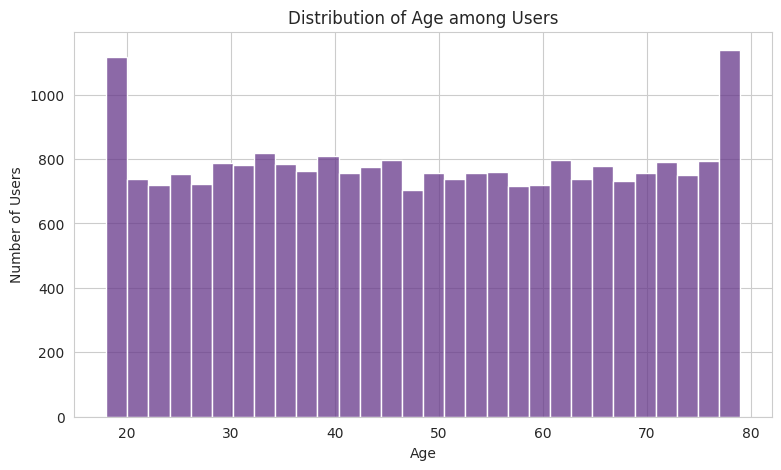

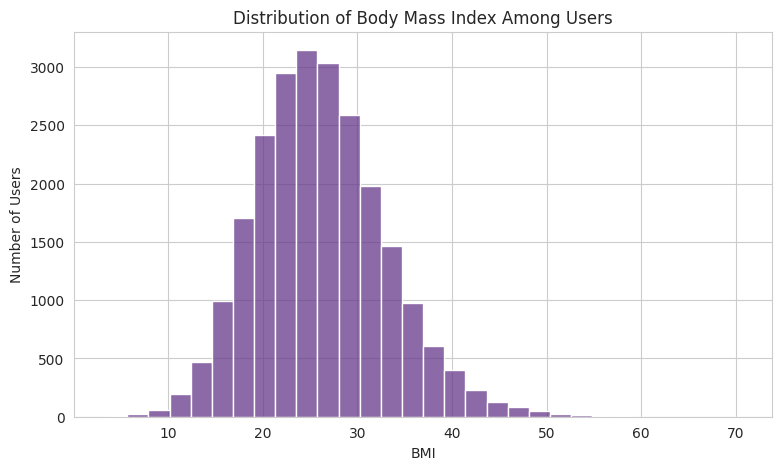

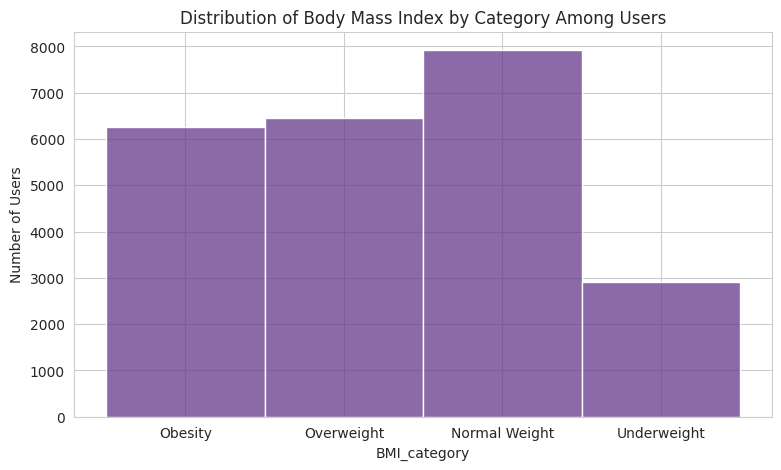

In [ ]:
### Emily ###

### Plots ###
# Import necessary libraries

# Set the style for seaborn
sns.set_style('whitegrid')

# Create a histogram for the 'Age' feature
plt.figure(figsize=(9, 5))
sns.histplot(df['Age'], bins=30, kde=False, color='#66378a')
plt.title('Distribution of Age among Users')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

### Histogram for BMI distribution ###
plt.figure(figsize=(9, 5))
sns.histplot(df['BMI'], bins=30, kde=False, color='#66378a')
plt.title('Distribution of Body Mass Index Among Users')
plt.xlabel('BMI')
plt.ylabel('Number of Users')
plt.show()

### Histogram for BMI distribution based on the categories ###
plt.figure(figsize=(9, 5))
sns.histplot(df['BMI_category'], bins=30, kde=False, color='#66378a')
plt.title('Distribution of Body Mass Index by Category Among Users')
plt.xlabel('BMI_category')
plt.ylabel('Number of Users')
plt.show()

## Descriptive Analysis

In [ ]:
# Look at districptive statistics

descriptor_vals = {'Count': df.describe().loc['count'], 'Mean': df.describe().loc['mean'], 'Standard Deviation': df.describe().loc['std'], 'Min': df.describe().loc['min'], 'Q1': df.describe().loc['25%'], 'Median': df.describe().loc['50%'], 'Q3' : df.describe().loc['75%'], 'Max': df.describe().loc['max']}
descriptors = pd.DataFrame(data=descriptor_vals)

display(descriptors.round(2))

# Information on categorical variables BMI_caetgory and Gender
print(df['Gender'].value_counts())
print(df['BMI_category'].value_counts())

,Count,Mean,Standard Deviation,Min,Q1,Median,Q3,Max
Age,23535.0,48.53,17.87,18.00,33.00,48.00,64.00,79.00
Gender,23535.0,0.63,0.48,0.00,0.00,1.00,1.00,1.00
Calorie_Intake,23535.0,2495.85,577.80,1500.00,1991.00,2495.00,2994.00,3499.00
Sugar_Intake,23535.0,64.82,32.00,10.00,37.00,65.00,93.00,119.00
Physical_Activity,23535.0,89.50,52.12,0.00,45.00,90.00,135.00,179.00
Fast_Food_Frequency,23535.0,2.02,1.41,0.00,1.00,2.00,3.00,4.00
Screen_Time,23535.0,5.49,3.45,0.00,2.00,6.00,8.00,11.00
Height,23535.0,1.65,0.12,1.20,1.57,1.65,1.73,2.15
Weight,23535.0,70.02,15.02,10.01,59.86,70.02,80.04,126.49
BMI,23535.0,26.13,6.88,3.44,21.34,25.66,30.33,70.48


1    14896
0     8639
Name: Gender, dtype: int64
Normal Weight    7922
Overweight       6444
Obesity          6256
Underweight      2913
Name: BMI_category, dtype: int64


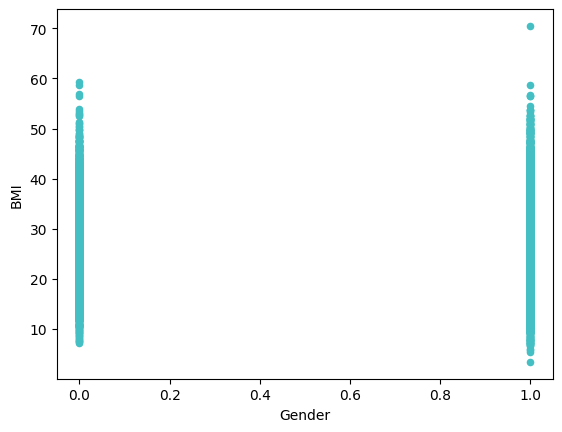

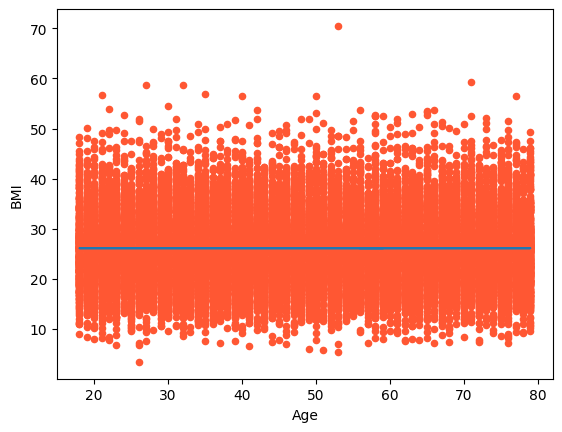

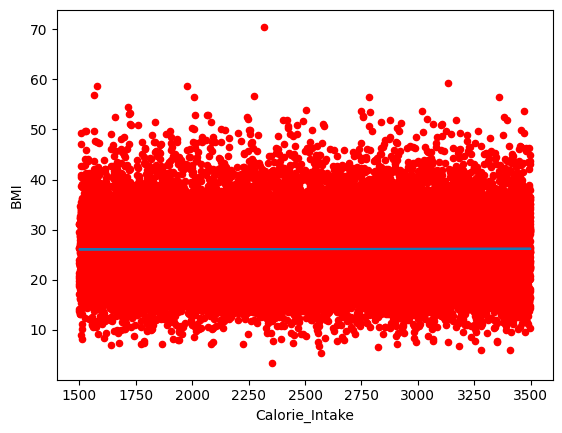

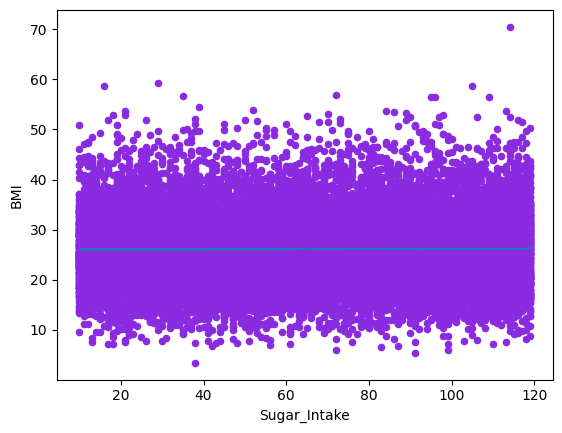

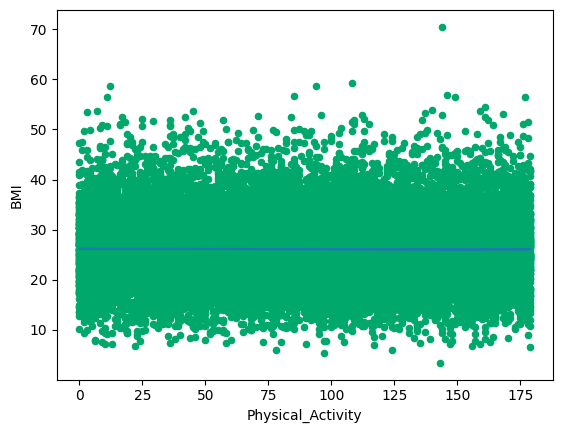

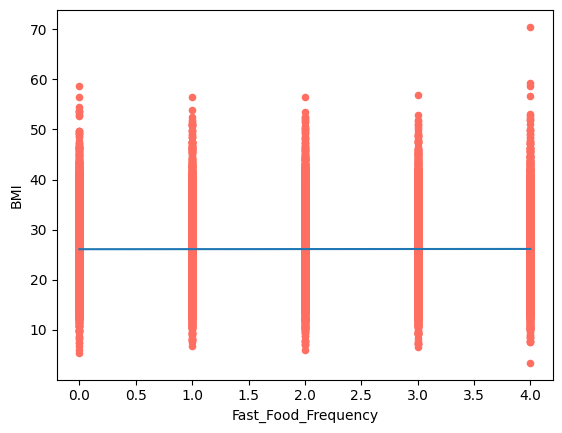

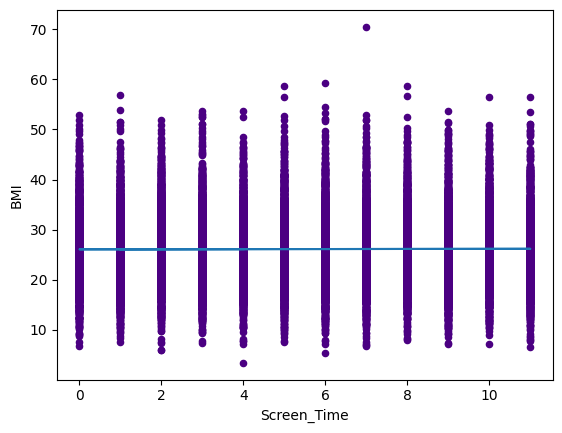

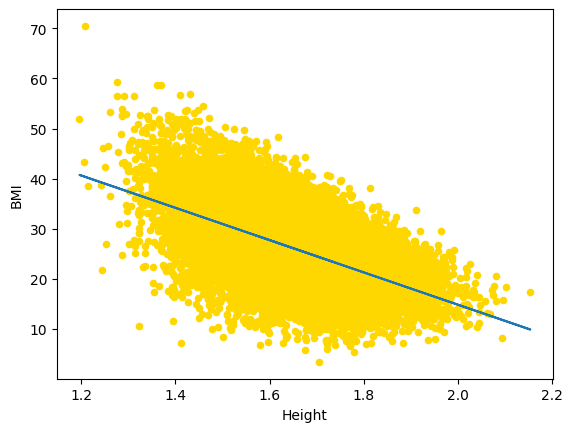

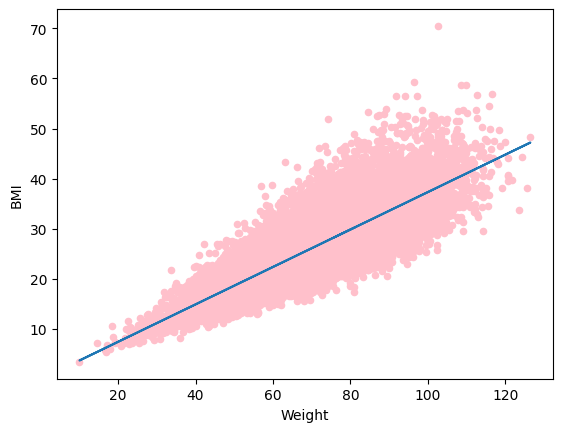

In [ ]:
#visualize the data

features = ['Age', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight', 'BMI']
features_length = len(features)
colours = ['#FF5733', '#FF0000', '#8A2BE2', '#00A86B', '#FF6F61', '#4B0082', '#FFD700', '#FFC0CB']

cat_features = ['Gender', 'BMI']
df[cat_features].plot.scatter(x=cat_features[0], y=cat_features[1], color='#44BFC3')
plt.show()

for i in range(features_length - 1):
  colour = colours[i]
  df[features].plot.scatter(x=features[i], y=features[8], color=colour)
  m,b = np.polyfit(df[features[i]], df[features[8]], 1)
  plt.plot(df[features[i]], m*df[features[i]]+b)
  plt.show()

## Regression Analysis

In [ ]:
# Linear Regression Analysis
x = df[['Age','Gender','Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency','Screen_Time']]
y = df[['BMI']]

x = statsmodel.add_constant(x)
model = statsmodel.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2585
Date:                Tue, 26 Sep 2023   Prob (F-statistic):              0.970
Time:                        02:53:00   Log-Likelihood:                -78768.
No. Observations:               23535   AIC:                         1.576e+05
Df Residuals:                   23527   BIC:                         1.576e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  25.8979    

In [ ]:
# Correlation Calculations
corr = df.corr()
round (corr,4)

<ipython-input-14-4a2d829766bb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
Age,1.0000,0.0063,0.0075,0.0015,-0.0005,-0.0124,0.0092,0.0019,-0.0006,-0.0002
Gender,0.0063,1.0000,-0.0062,0.0023,-0.0036,0.0123,-0.0104,0.0021,0.0025,0.0015
Calorie_Intake,0.0075,-0.0062,1.0000,-0.0014,0.0058,0.0020,0.0062,0.0041,0.0070,0.0052
Sugar_Intake,0.0015,0.0023,-0.0014,1.0000,-0.0107,0.0030,-0.0190,-0.0065,-0.0019,0.0021
Physical_Activity,-0.0005,-0.0036,0.0058,-0.0107,1.0000,-0.0063,-0.0042,0.0000,-0.0022,-0.0036
Fast_Food_Frequency,-0.0124,0.0123,0.0020,0.0030,-0.0063,1.0000,-0.0021,-0.0000,0.0034,0.0026
Screen_Time,0.0092,-0.0104,0.0062,-0.0190,-0.0042,-0.0021,1.0000,0.0034,0.0094,0.0048
Height,0.0019,0.0021,0.0041,-0.0065,0.0000,-0.0000,0.0034,1.0000,-0.0018,-0.5606
Weight,-0.0006,0.0025,0.0070,-0.0019,-0.0022,0.0034,0.0094,-0.0018,1.0000,0.8153
BMI,-0.0002,0.0015,0.0052,0.0021,-0.0036,0.0026,0.0048,-0.5606,0.8153,1.0000


## KNN Analysis

[[790 420 299  53]
 [657 309 221  57]
 [690 326 230  42]
 [299 164 129  21]]
               precision    recall  f1-score   support

Normal Weight       0.32      0.51      0.40      1562
      Obesity       0.25      0.25      0.25      1244
   Overweight       0.26      0.18      0.21      1288
  Underweight       0.12      0.03      0.05       613

     accuracy                           0.29      4707
    macro avg       0.24      0.24      0.23      4707
 weighted avg       0.26      0.29      0.26      4707



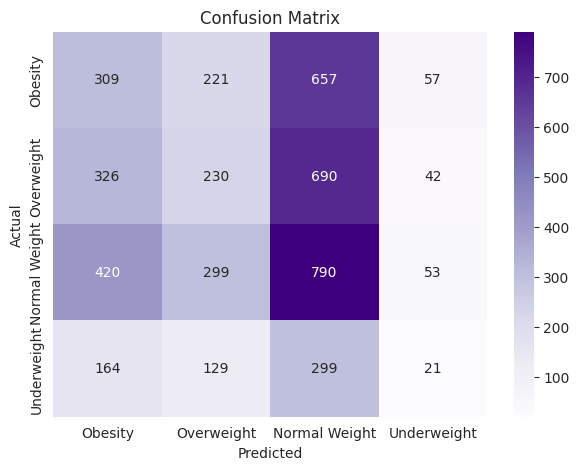

In [ ]:
### Emily ###

### KNN Analysis ###
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Add "BMI category" as a column
df['BMI_category'] = df['BMI'].apply(get_category)

# Training

X = df[['Age', 'Gender','Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency','Screen_Time']]
y = df['BMI_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Setting K to 5
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Precision and accuracy
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Confusion matrix - performance of the KNN model ###
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique classes
classes = df['BMI_category'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## K-Means Analysis

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


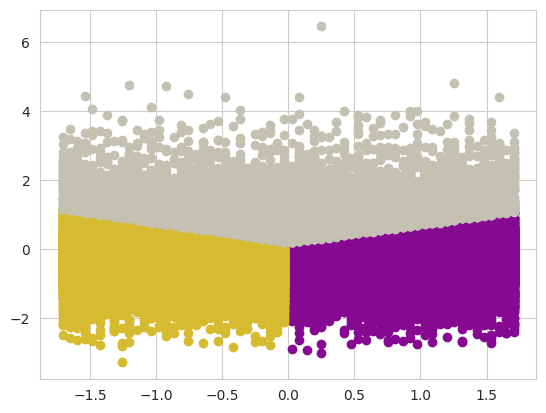

In [ ]:
# K-Means Analysis
###Arij###


# Required libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Function to visualize the clustering results
def plot_clusters(x, labels, k):
    # Define colors for each cluster
    colors = ['#860991', '#d6ba2f', '#c4c1b3']
    # Loop through each cluster
    for i in range(k):
        # Filter the data points that belong to the current cluster
        filtered_label0 = x[labels == i]
        # Plot the filtered data points using the corresponding color
        plt.scatter(filtered_label0[:, 0], filtered_label0[:, 1], c=colors[i])
    # Display the plot
    plt.show()

# Choose two features, 'bmi' and 'age', for clustering and visualization
features = ['Age', 'BMI']

# Convert the selected features from DataFrame to a NumPy array for easier processing with sklearn
data =  df[features].to_numpy()

# Standardize the data - this makes the mean 0 and standard deviation 1 for each feature
# Standardization can help the k-means algorithm perform better as it's sensitive to feature scales
st_x = StandardScaler()
data = st_x.fit_transform(data)

# Apply k-means clustering on the standardized data
# Here, we're specifying 3 clusters with a fixed random state for reproducibility
kmeans = KMeans(n_clusters=3, random_state=0)
label = kmeans.fit_predict(data)

# Visualize the clustering results using the defined function
plot_clusters(data, label, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


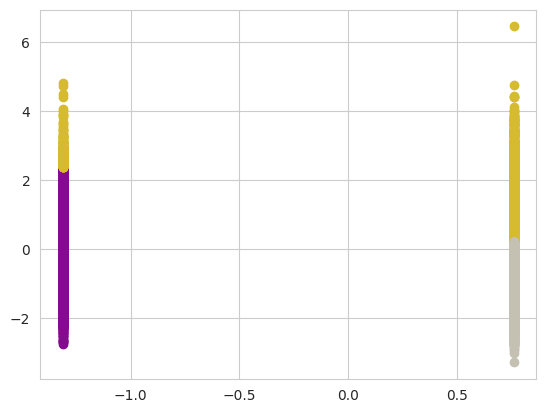

In [ ]:
# Choose two features, 'bmi' and 'gender', for clustering and visualization
features = ['Gender', 'BMI']

# Convert the selected features from DataFrame to a NumPy array for easier processing with sklearn
data =  df[features].to_numpy()

# Standardize the data - this makes the mean 0 and standard deviation 1 for each feature
# Standardization can help the k-means algorithm perform better as it's sensitive to feature scales
st_x = StandardScaler()
data = st_x.fit_transform(data)

# Apply k-means clustering on the standardized data
# Here, we're specifying 3 clusters with a fixed random state for reproducibility
kmeans = KMeans(n_clusters=3, random_state=0)
label = kmeans.fit_predict(data)

# Visualize the clustering results using the defined function
plot_clusters(data, label, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


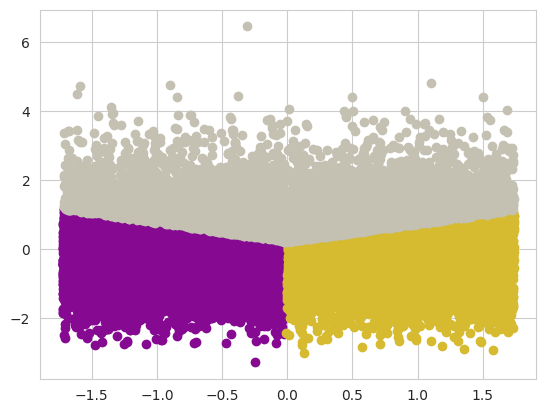

In [ ]:
# Choose two features, 'bmi' and 'Calorie_Intake ', for clustering and visualization
features = ['Calorie_Intake', 'BMI']

# Convert the selected features from DataFrame to a NumPy array for easier processing with sklearn
data =  df[features].to_numpy()

# Standardize the data - this makes the mean 0 and standard deviation 1 for each feature
# Standardization can help the k-means algorithm perform better as it's sensitive to feature scales
st_x = StandardScaler()
data = st_x.fit_transform(data)

# Apply k-means clustering on the standardized data
# Here, we're specifying 3 clusters with a fixed random state for reproducibility
kmeans = KMeans(n_clusters=3, random_state=0)
label = kmeans.fit_predict(data)

# Visualize the clustering results using the defined function
plot_clusters(data, label, 3)

In [ ]:
# Choose two features, 'bmi' and 'Sugar_Intake ', for clustering and visualization
features = ['Sugar_Intake', 'BMI']

# Convert the selected features from DataFrame to a NumPy array for easier processing with sklearn
data =  df[features].to_numpy()

# Standardize the data - this makes the mean 0 and standard deviation 1 for each feature
# Standardization can help the k-means algorithm perform better as it's sensitive to feature scales
st_x = StandardScaler()
data = st_x.fit_transform(data)

# Apply k-means clustering on the standardized data
# Here, we're specifying 3 clusters with a fixed random state for reproducibility
kmeans = KMeans(n_clusters=3, random_state=0)
label = kmeans.fit_predict(data)

# Visualize the clustering results using the defined function
plot_clusters(data, label, 3)

In [ ]:
# Choose two features, 'bmi' and 'Physical_Activity', for clustering and visualization
features = ['Physical_Activity', 'BMI']

# Convert the selected features from DataFrame to a NumPy array for easier processing with sklearn
data =  df[features].to_numpy()

# Standardize the data - this makes the mean 0 and standard deviation 1 for each feature
# Standardization can help the k-means algorithm perform better as it's sensitive to feature scales
st_x = StandardScaler()
data = st_x.fit_transform(data)

# Apply k-means clustering on the standardized data
# Here, we're specifying 3 clusters with a fixed random state for reproducibility
kmeans = KMeans(n_clusters=3, random_state=0)
label = kmeans.fit_predict(data)

# Visualize the clustering results using the defined function
plot_clusters(data, label, 3)

In [ ]:
# Choose two features, 'bmi' and 'Fast_Food_Frequency', for clustering and visualization
features = ['Fast_Food_Frequency', 'BMI']

# Convert the selected features from DataFrame to a NumPy array for easier processing with sklearn
data =  df[features].to_numpy()

# Standardize the data - this makes the mean 0 and standard deviation 1 for each feature
# Standardization can help the k-means algorithm perform better as it's sensitive to feature scales
st_x = StandardScaler()
data = st_x.fit_transform(data)

# Apply k-means clustering on the standardized data
# Here, we're specifying 3 clusters with a fixed random state for reproducibility
kmeans = KMeans(n_clusters=3, random_state=0)
label = kmeans.fit_predict(data)

# Visualize the clustering results using the defined function
plot_clusters(data, label, 3)

In [ ]:
# Choose two features, 'bmi' and 'Screen_Time', for clustering and visualization
features = ['Screen_Time', 'BMI']

# Convert the selected features from DataFrame to a NumPy array for easier processing with sklearn
data =  df[features].to_numpy()

# Standardize the data - this makes the mean 0 and standard deviation 1 for each feature
# Standardization can help the k-means algorithm perform better as it's sensitive to feature scales
st_x = StandardScaler()
data = st_x.fit_transform(data)

# Apply k-means clustering on the standardized data
# Here, we're specifying 3 clusters with a fixed random state for reproducibility
kmeans = KMeans(n_clusters=3, random_state=0)
label = kmeans.fit_predict(data)

# Visualize the clustering results using the defined function
plot_clusters(data, label, 3)

In [ ]:
# Choose two features, 'bmi' and 'Physical_Activity', for clustering and visualization
features = ['Physical_Activity', 'BMI']

# Convert the selected features from DataFrame to a NumPy array for easier processing with sklearn
data =  df[features].to_numpy()

# Standardize the data - this makes the mean 0 and standard deviation 1 for each feature
# Standardization can help the k-means algorithm perform better as it's sensitive to feature scales
st_x = StandardScaler()
data = st_x.fit_transform(data)

# Apply k-means clustering on the standardized data
# Here, we're specifying 3 clusters with a fixed random state for reproducibility
kmeans = KMeans(n_clusters=3, random_state=0)
label = kmeans.fit_predict(data)

# Visualize the clustering results using the defined function
plot_clusters(data, label, 3)

In [ ]:
# Choose two features, 'bmi' and 'Physical_Activity', for clustering and visualization
features = ['Physical_Activity', 'BMI']

# Convert the selected features from DataFrame to a NumPy array for easier processing with sklearn
data =  df[features].to_numpy()

# Standardize the data - this makes the mean 0 and standard deviation 1 for each feature
# Standardization can help the k-means algorithm perform better as it's sensitive to feature scales
st_x = StandardScaler()
data = st_x.fit_transform(data)

# Apply k-means clustering on the standardized data
# Here, we're specifying 5 clusters with a fixed random state for reproducibility
kmeans = KMeans(n_clusters=5, random_state=0)
label = kmeans.fit_predict(data)

# Visualize the clustering results using the defined function
plot_clusters(data, label, 3)

In [ ]:
# Choose two features, 'bmi' and 'Physical_Activity', for clustering and visualization
features = ['Physical_Activity', 'BMI']

# Convert the selected features from DataFrame to a NumPy array for easier processing with sklearn
data =  df[features].to_numpy()

# Standardize the data - this makes the mean 0 and standard deviation 1 for each feature
# Standardization can help the k-means algorithm perform better as it's sensitive to feature scales
st_x = StandardScaler()
data = st_x.fit_transform(data)

# Apply k-means clustering on the standardized data
# Here, we're specifying 7 clusters with a fixed random state for reproducibility
kmeans = KMeans(n_clusters=7, random_state=0)
label = kmeans.fit_predict(data)

# Visualize the clustering results using the defined function
plot_clusters(data, label, 3)

In [ ]:
# Choose two features, 'bmi' and 'Physical_Activity', for clustering and visualization
features = ['Physical_Activity', 'BMI']

# Convert the selected features from DataFrame to a NumPy array for easier processing with sklearn
data =  df[features].to_numpy()

# Standardize the data - this makes the mean 0 and standard deviation 1 for each feature
# Standardization can help the k-means algorithm perform better as it's sensitive to feature scales
st_x = StandardScaler()
data = st_x.fit_transform(data)

# Apply k-means clustering on the standardized data
# Here, we're specifying 3 clusters with a fixed random state for reproducibility
kmeans = KMeans(n_clusters=3, random_state=0)
label = kmeans.fit_predict(data)

# Visualize the clustering results using the defined function
plot_clusters(data, label, 3)

In [ ]:
# Choose two features, 'Sugar_Intake' and 'Physical_Activity', for clustering and visualization
features = ['Physical_Activity', 'Sugar_Intake']

# Convert the selected features from DataFrame to a NumPy array for easier processing with sklearn
data =  df[features].to_numpy()

# Standardize the data - this makes the mean 0 and standard deviation 1 for each feature
# Standardization can help the k-means algorithm perform better as it's sensitive to feature scales
st_x = StandardScaler()
data = st_x.fit_transform(data)

# Apply k-means clustering on the standardized data
# Here, we're specifying 3 clusters with a fixed random state for reproducibility
kmeans = KMeans(n_clusters=3, random_state=0)
label = kmeans.fit_predict(data)

# Visualize the clustering results using the defined function
plot_clusters(data, label, 3)

In [ ]:
# Choose two features, 'Age' and 'Physical_Activity', for clustering and visualization
features = ['Physical_Activity', 'Age']

# Convert the selected features from DataFrame to a NumPy array for easier processing with sklearn
data =  df[features].to_numpy()

# Standardize the data - this makes the mean 0 and standard deviation 1 for each feature
# Standardization can help the k-means algorithm perform better as it's sensitive to feature scales
st_x = StandardScaler()
data = st_x.fit_transform(data)

# Apply k-means clustering on the standardized data
# Here, we're specifying 3 clusters with a fixed random state for reproducibility
kmeans = KMeans(n_clusters=3, random_state=0)
label = kmeans.fit_predict(data)

# Visualize the clustering results using the defined function
plot_clusters(data, label, 3)